In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense

In [2]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
df = pd.read_csv('Breast_cancer_data.csv')
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [4]:
df1 = df.copy()

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [6]:
df1.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [7]:
# df1.duplicated().sum()
df1.isna().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

<AxesSubplot:ylabel='diagnosis'>

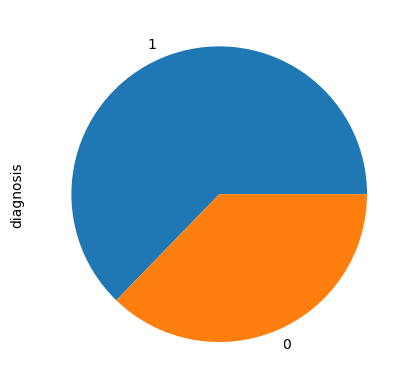

In [8]:
df1.diagnosis.value_counts().plot.pie()

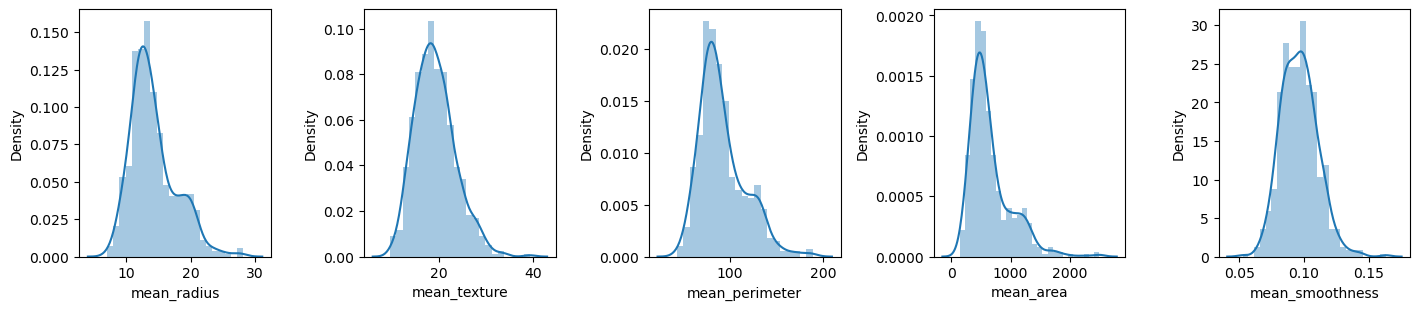

In [9]:
features = list(df1.select_dtypes(include = np.number).columns)
features.remove('diagnosis')

plt.subplots(figsize=(20,15))
 
for i, col in enumerate(features):
  plt.subplot(5,7, i + 1)
  sns.distplot(df1[col])
plt.tight_layout()
plt.show()

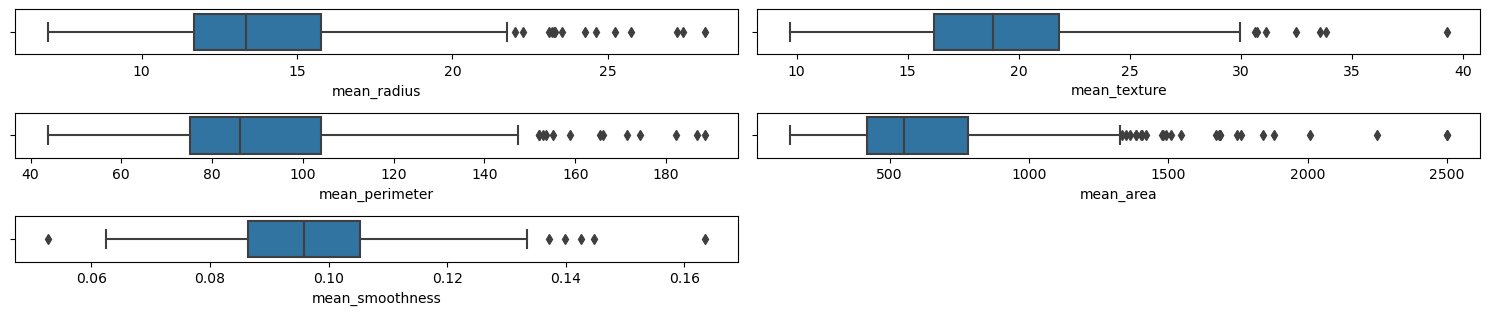

In [10]:
plt.subplots(figsize=(15,8))
 
for i, col in enumerate(features):
  plt.subplot(8,2, i + 1)
  sns.boxplot(df1[col])
plt.tight_layout()
plt.show()

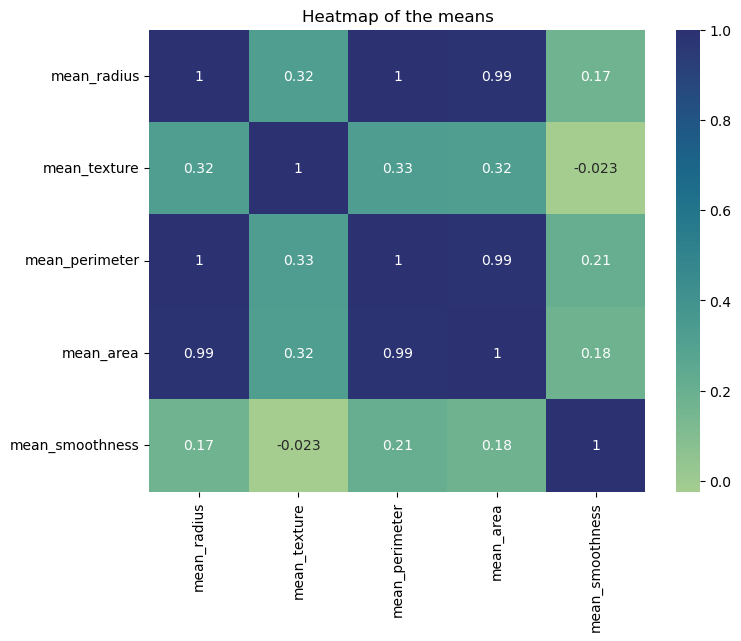

In [11]:
# Create a heatmap of the 'mean' values to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(df1[['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness']].corr(), annot=True, cmap="crest")
plt.title('Heatmap of the means')
plt.show()

Apply random forest model with hyperparameters

In [12]:
X = df1.copy()
X = X.drop("diagnosis", axis = 1)
y = df1["diagnosis"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [ ]:
%%time

rf = RandomForestClassifier(random_state=0)
cv_params = {'max_depth': [2,3,4,5, None], 
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'max_features': [2,3,4],
             'n_estimators': [75, 100, 125, 150]
             }  

scoring = {'accuracy', 'precision', 'recall', 'f1'}

rf_ = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='f1').fit(X_train, y_train)

In [ ]:
rf_.best_params_

In [ ]:
rf_.best_score_

In [ ]:
def make_results(model_name, model_object):
    '''
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.
    '''

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'Model': [model_name],
                          'F1': [f1],
                          'Recall': [recall],
                          'Precision': [precision],
                          'Accuracy': [accuracy]
                         }
                        )

    return table

In [ ]:
rf_cv_results = make_results('Random Forest CV', rf_)
rf_cv_results

In [ ]:
rf.fit(X_train, y_train)
importances = rf.feature_importances_
forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=True)

plt.figure()
forest_importances.plot(kind='barh')
plt.title('Feature importance')
plt.show()

Experiment: achieve the same goal, but using Neural network (Keras)

In [ ]:
# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train, y_train, epochs=200, batch_size=256, validation_split=0.2)

In [ ]:
# Evaluate the model on the test set
y_prob = model.predict(X_test)
y_pred = (y_prob > 0.5).astype(int)
f1 = f1_score(y_test, y_pred)
print(f'F1 score on the test set: {f1}')

In this case I've got better results with a tree based classifier, although I already used a big batch size and epoch value.
But it is important to mark that here I used a relatively small dataframe. With a more diverse data and/or bigger table the 
Neural Network most probably outperform the tree based approach (even with smaller epoch or batch size number)